BloomCheck: A Minimalistic PCOS Prediction and Awareness Platform

BloomCheck is a web-based application developed to spread awareness about Polycystic Ovary Syndrome (PCOS) and provide a simple, accessible tool for preliminary PCOS risk assessment. The platform enables users to input basic health metrics—such as age, weight, height, and menstrual cycle length—and returns a prediction of PCOS likelihood using a machine learning model.

The website includes:

🧠 PCOS Predictor: A clean and easy-to-use interface that provides quick predictions based on user input.

📄 About Page: An overview of the project’s purpose and development process.

Technologies Used: Python, Flask, HTML, CSS, scikit-learn
Deployment: Hosted on PythonAnywhere
Model: Trained on a real-world PCOS dataset.

Disclaimer: BloomCheck is an educational tool and should not be considered a diagnostic platform. Users are encouraged to consult a healthcare professional for medical advice and diagnosis.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/PCOS_data_MAIN.csv')

In [3]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [4]:
df.tail()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN
540,541,541,1,23,82.0,165.000,30.1,13,80,20,...,1.0,0,120,70,9,10,19.0,18.0,6.9,NaN


In [5]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [7]:
df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [8]:
df = df.drop('Unnamed: 44',axis = 1)

In [9]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [10]:
df["AMH(ng/mL)"].head()

,AMH(ng/mL)
0,2.07
1,1.53
2,6.63
3,1.22
4,2.26


In [11]:
df['II    beta-HCG(mIU/mL)'].head()

,II beta-HCG(mIU/mL)
0,1.99
1,1.99
2,494.08
3,1.99
4,801.45


In [12]:
#encoding
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')

In [13]:
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [15]:
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median(),inplace=True)

<ipython-input-15-0df87597a737>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median(),inplace=True)


In [16]:
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].median(),inplace=True)

<ipython-input-16-39680d29c3e7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].median(),inplace=True)


In [17]:
df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [18]:
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median(),inplace=True)

<ipython-input-18-aefa8e18bfe7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median(),inplace=True)


In [19]:
df['II    beta-HCG(mIU/mL)'].fillna(df['II    beta-HCG(mIU/mL)'].median(),inplace=True)

<ipython-input-19-893527003402>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['II    beta-HCG(mIU/mL)'].fillna(df['II    beta-HCG(mIU/mL)'].median(),inplace=True)


In [20]:
df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [22]:
df.duplicated().sum()

np.int64(0)

Data Visualizations

In [23]:
import matplotlib.pyplot as plt


In [24]:
import seaborn as sns

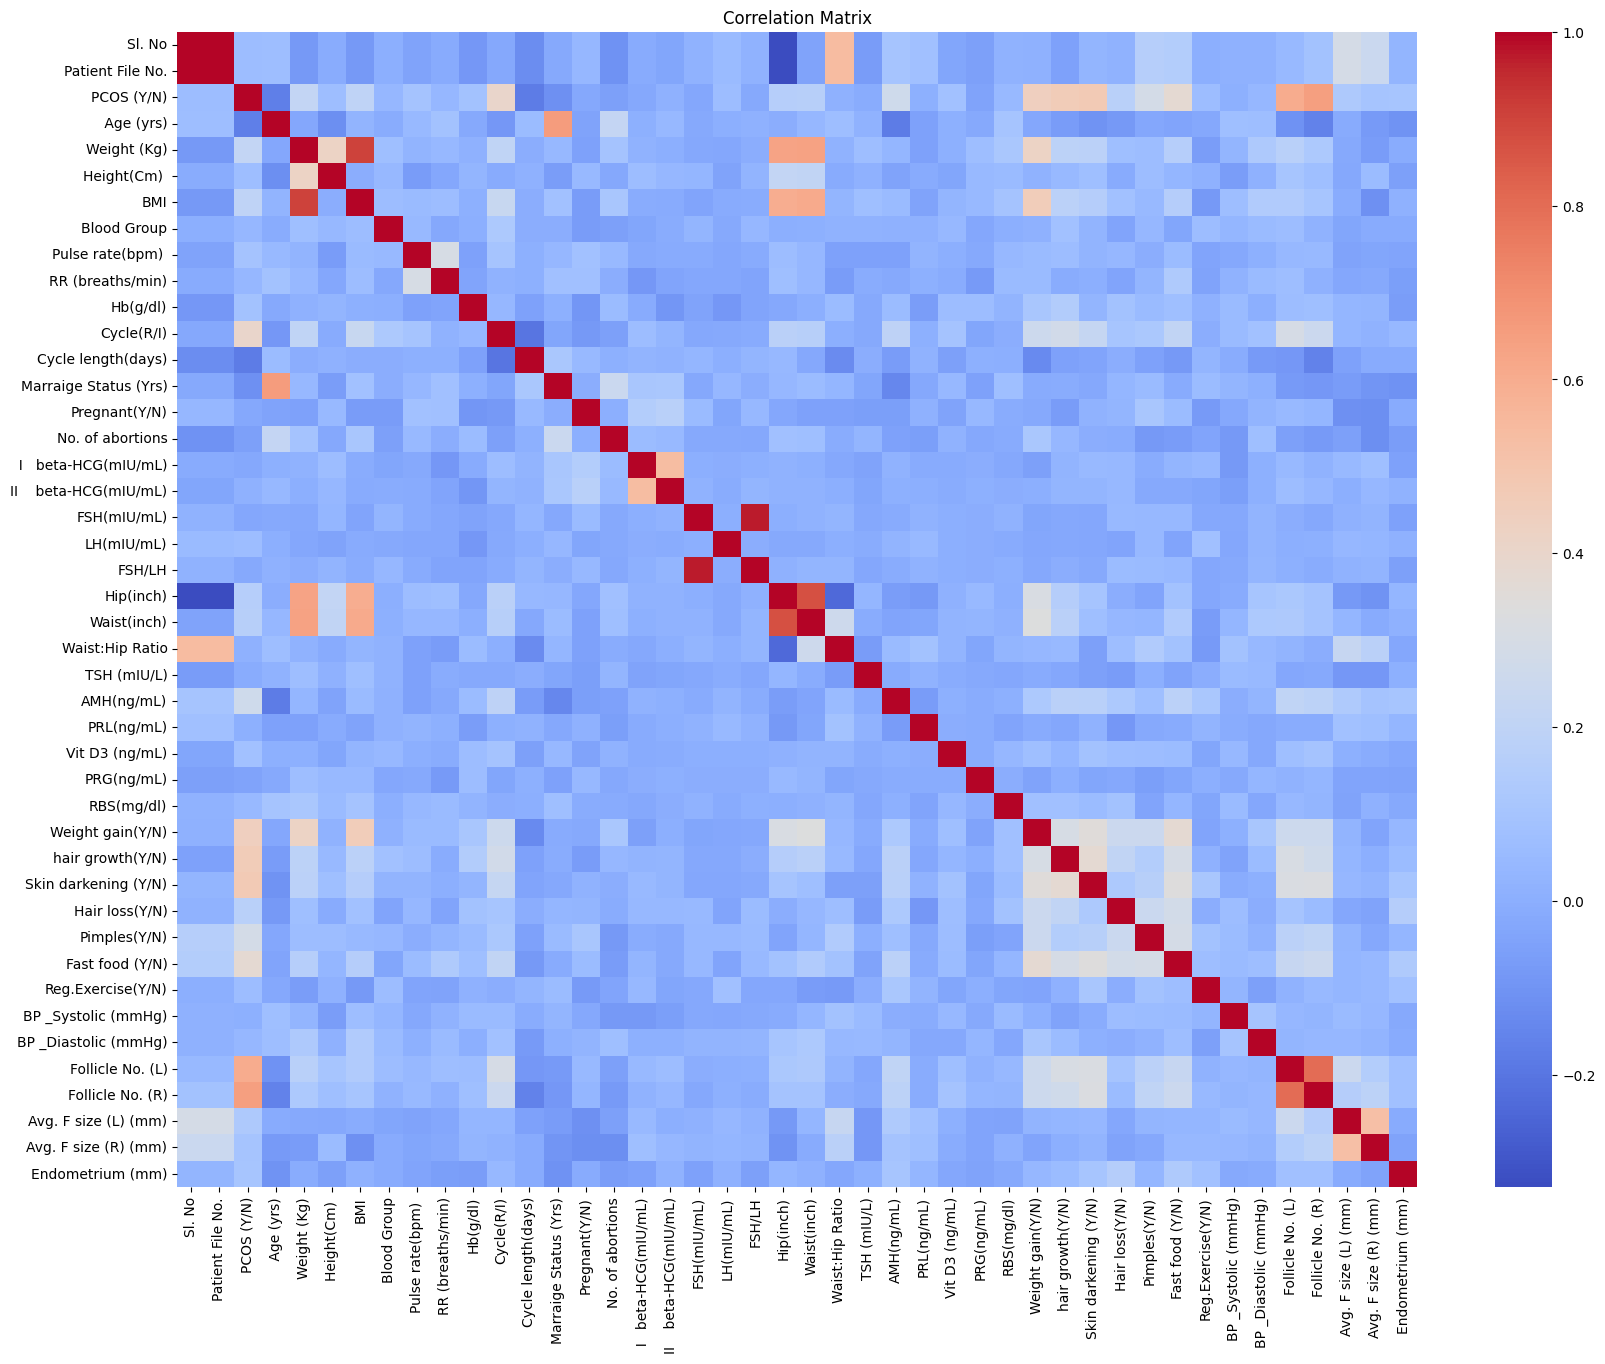

In [25]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

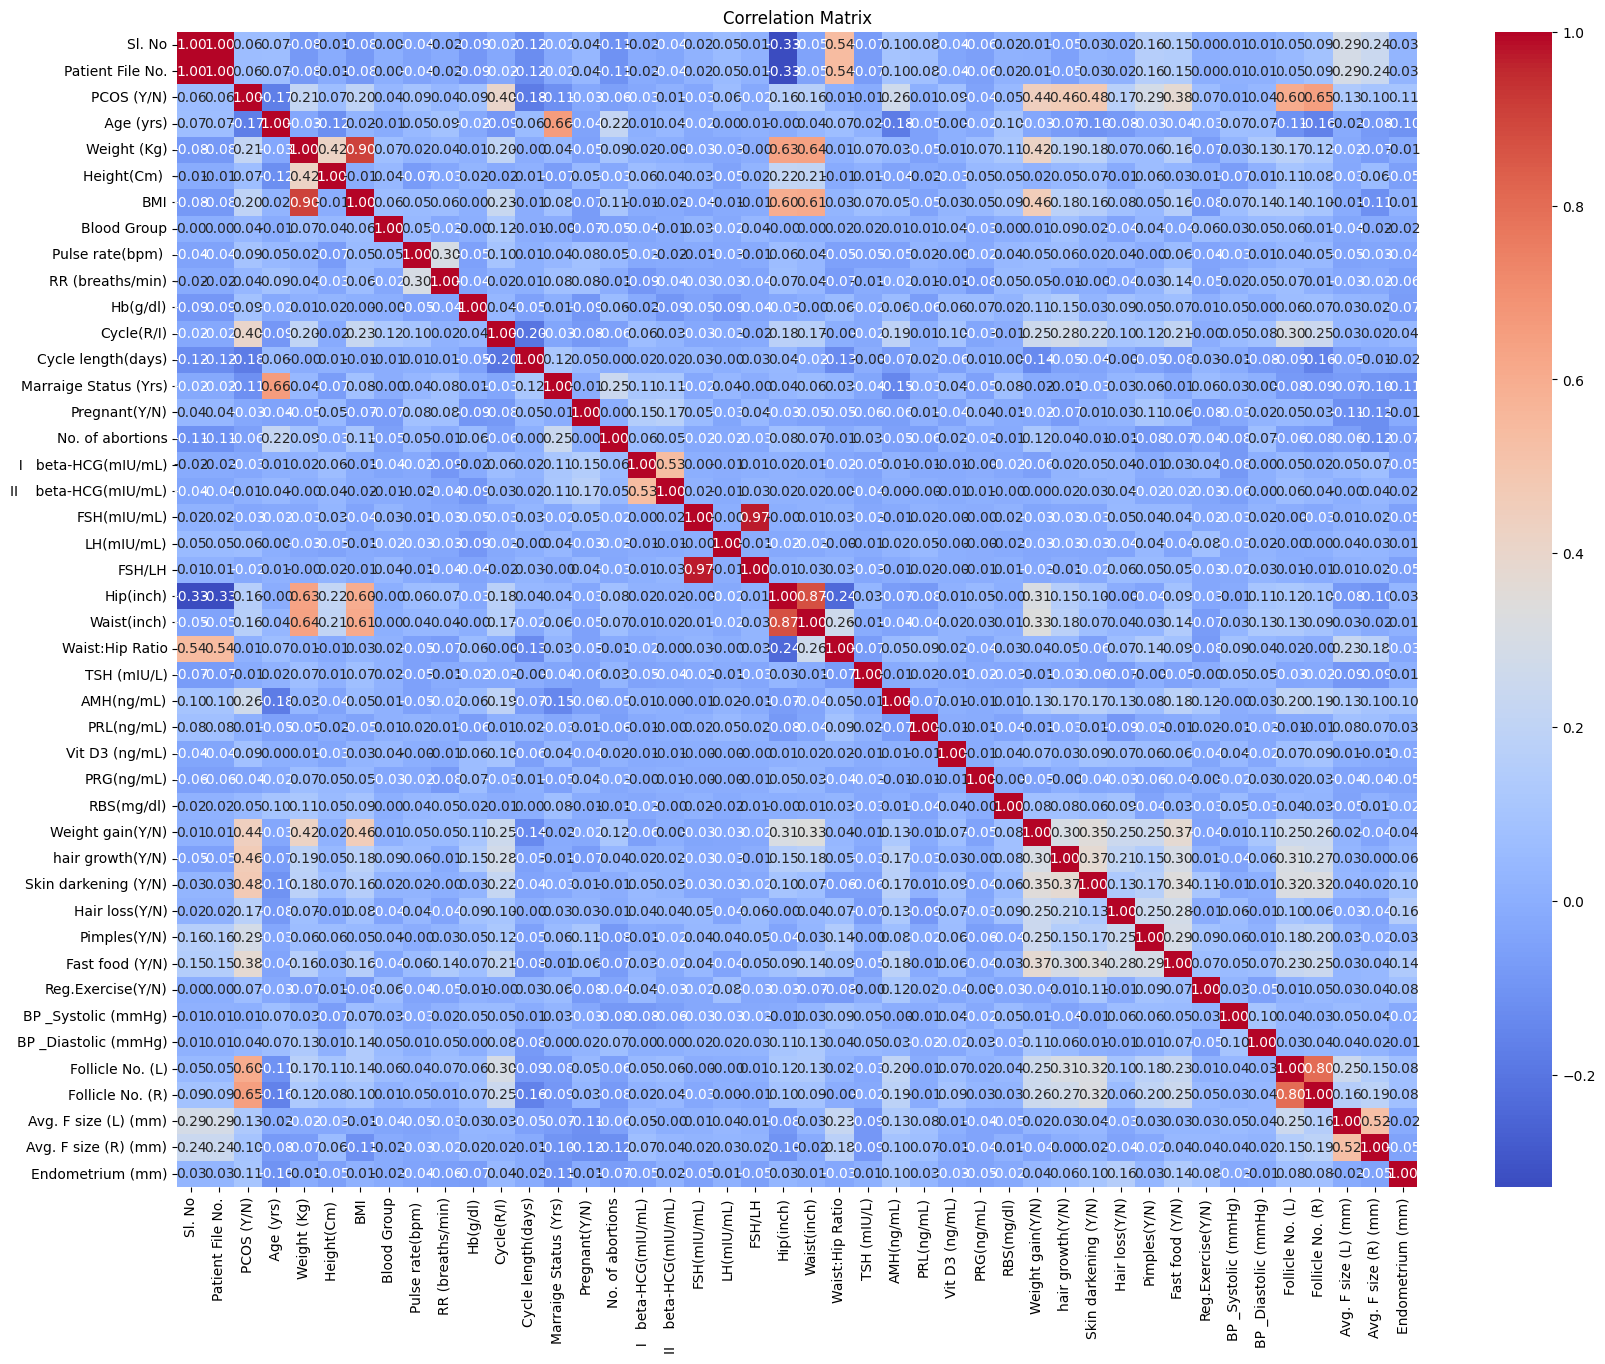

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Correlation with PCOS (Y/N)
pcos_correlation = correlation_matrix['PCOS (Y/N)'].sort_values(ascending=False)
print("Correlation of each feature with PCOS (Y/N):\n", pcos_correlation)

Correlation of each feature with PCOS (Y/N):
 PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199697
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.          0.060998
RBS(mg/dl)                0.048922
BP _Diast

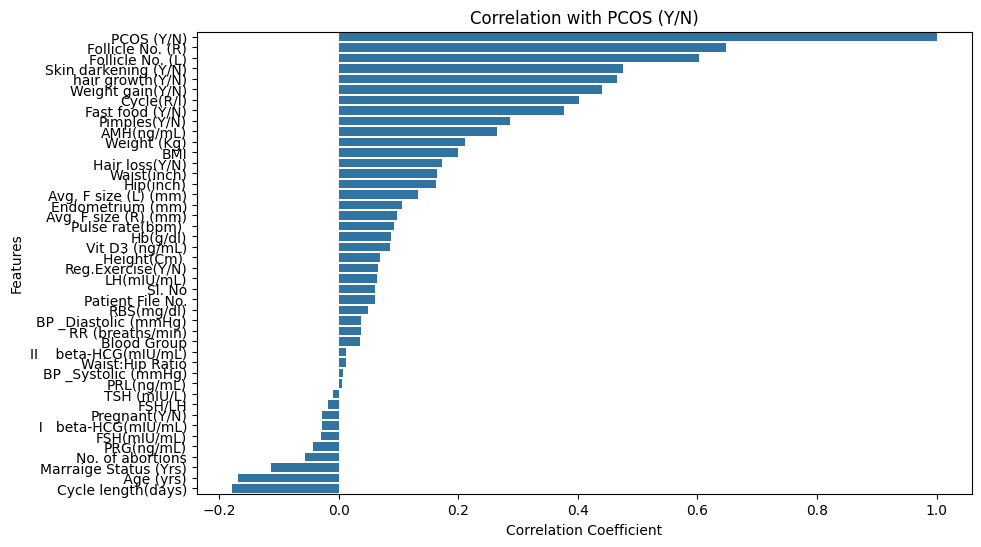

In [28]:
# Visualize the correlation of features with PCOS
plt.figure(figsize=(10, 6))
sns.barplot(x=pcos_correlation.values, y=pcos_correlation.index)
plt.title('Correlation with PCOS (Y/N)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [29]:
top_10_correlated = pcos_correlation.head(10)
print("\nTop 10 features most correlated with PCOS (Y/N):\n", top_10_correlated)


Top 10 features most correlated with PCOS (Y/N):
 PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.376183
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.264141
Name: PCOS (Y/N), dtype: float64


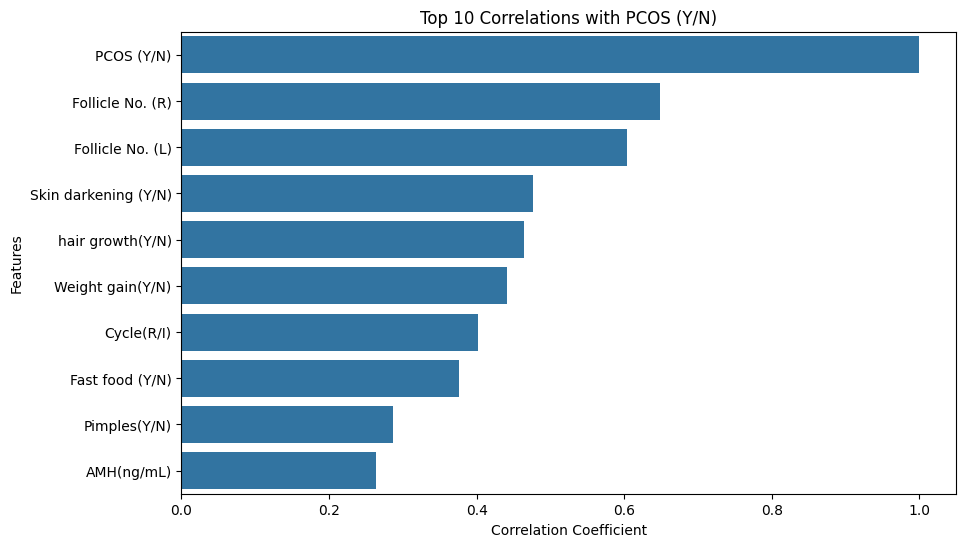

In [30]:
# Visualize the top 10 correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_correlated.values, y=top_10_correlated.index)
plt.title('Top 10 Correlations with PCOS (Y/N)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [31]:
least_correlated = pcos_correlation.tail(10)
print("\n10 features least correlated with PCOS (Y/N):\n", least_correlated)


10 features least correlated with PCOS (Y/N):
 TSH (mIU/L)              -0.010140
FSH/LH                   -0.018334
Pregnant(Y/N)            -0.027565
  I   beta-HCG(mIU/mL)   -0.027617
FSH(mIU/mL)              -0.030319
PRG(ng/mL)               -0.043834
No. of abortions         -0.057158
Marraige Status (Yrs)    -0.113056
 Age (yrs)               -0.168513
Cycle length(days)       -0.178480
Name: PCOS (Y/N), dtype: float64


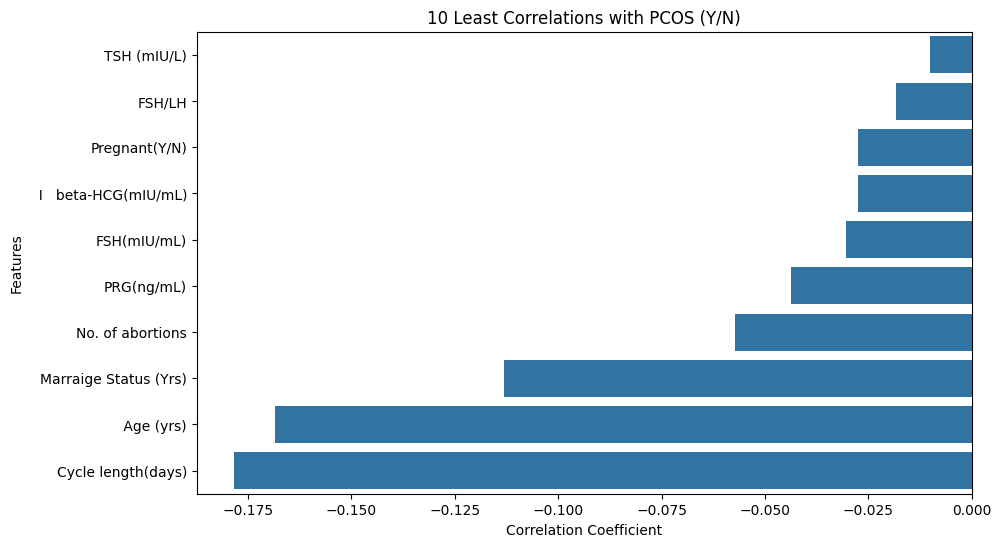

In [32]:
# Visualize the least 10 correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=least_correlated.values, y=least_correlated.index)
plt.title('10 Least Correlations with PCOS (Y/N)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

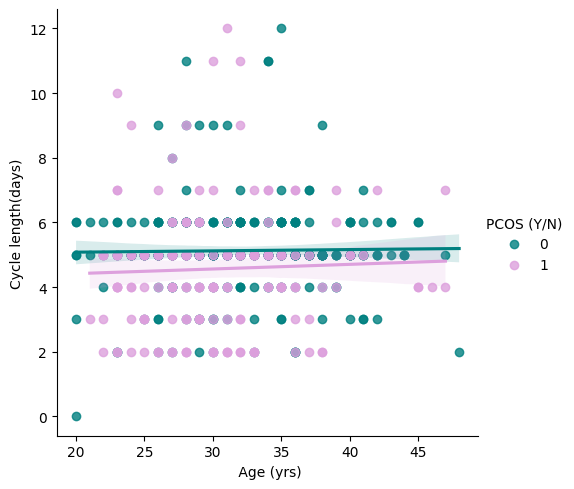

In [33]:
# Length of menstrual phase in PCOS vs normal
color = ["teal", "plum"]
fig=sns.lmplot(data=df,x=' Age (yrs)',y='Cycle length(days)', hue='PCOS (Y/N)',palette=color)
plt.show(fig)

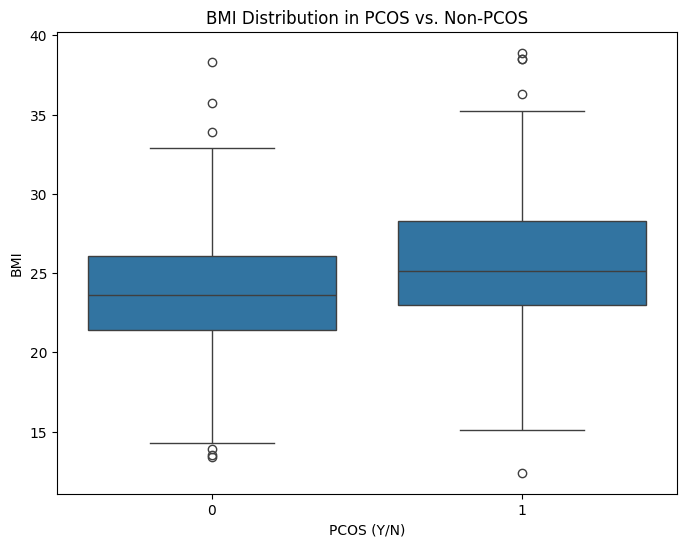

In [34]:
# Comparison of BMI and PCOS
plt.figure(figsize=(8, 6))
sns.boxplot(x='PCOS (Y/N)', y='BMI', data=df)
plt.title('BMI Distribution in PCOS vs. Non-PCOS')
plt.xlabel('PCOS (Y/N)')
plt.ylabel('BMI')
plt.show()

In [35]:
# Calculate the mean BMI for PCOS and non-PCOS groups
mean_bmi_pcos = df[df['PCOS (Y/N)'] == 1]['BMI'].mean()
mean_bmi_non_pcos = df[df['PCOS (Y/N)'] == 0]['BMI'].mean()

print(f"Mean BMI for PCOS: {mean_bmi_pcos:.2f}")
print(f"Mean BMI for Non-PCOS: {mean_bmi_non_pcos:.2f}")

Mean BMI for PCOS: 25.47
Mean BMI for Non-PCOS: 23.74


In [36]:
# Perform a t-test to compare the means of BMI between PCOS and non-PCOS groups
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(
    df[df['PCOS (Y/N)'] == 1]['BMI'], df[df['PCOS (Y/N)'] == 0]['BMI']
)
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

T-statistic: 4.73
P-value: 0.000


In [37]:
# Calculate the mean cycle length for PCOS and non-PCOS groups
mean_cycle_pcos = df[df['PCOS (Y/N)'] == 1]['Cycle length(days)'].mean()
mean_cycle_non_pcos = df[df['PCOS (Y/N)'] == 0]['Cycle length(days)'].mean()

print(f"Mean Cycle Length for PCOS: {mean_cycle_pcos:.2f}")
print(f"Mean Cycle Length for Non-PCOS: {mean_cycle_non_pcos:.2f}")

Mean Cycle Length for PCOS: 4.56
Mean Cycle Length for Non-PCOS: 5.13


In [38]:
#t-test to compare the means of cycle length between PCOS and non-PCOS groups
t_statistic, p_value = ttest_ind(
    df[df['PCOS (Y/N)'] == 1]['Cycle length(days)'],
    df[df['PCOS (Y/N)'] == 0]['Cycle length(days)']
)
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

T-statistic: -4.21
P-value: 0.000


Model Building

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [40]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [41]:
# X=df.drop(["PCOS (Y/N)","Sl. No",'Patient File No.'],axis = 1) #droping out index from features too
# y=df["PCOS (Y/N)"]

# X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [42]:
X = df[[' Age (yrs)', 'Weight (Kg)','Height(Cm) ', 'BMI', 'Cycle(R/I)', 'Cycle length(days)','Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)']]
y=df["PCOS (Y/N)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
X_train.shape

(432, 10)

In [44]:
X_test.shape

(109, 10)

In [45]:
y_test.shape

(109,)

In [46]:
y_train.shape

(432,)

In [47]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred = rf_classifier.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest Classifier: {accuracy}")

Accuracy of the Random Forest Classifier: 0.7981651376146789


In [50]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [51]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [52]:
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [53]:
y_pred_best = best_rf_classifier.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the best Random Forest Classifier: {best_accuracy}")

Accuracy of the best Random Forest Classifier: 0.7798165137614679


In [54]:
from sklearn.metrics import confusion_matrix

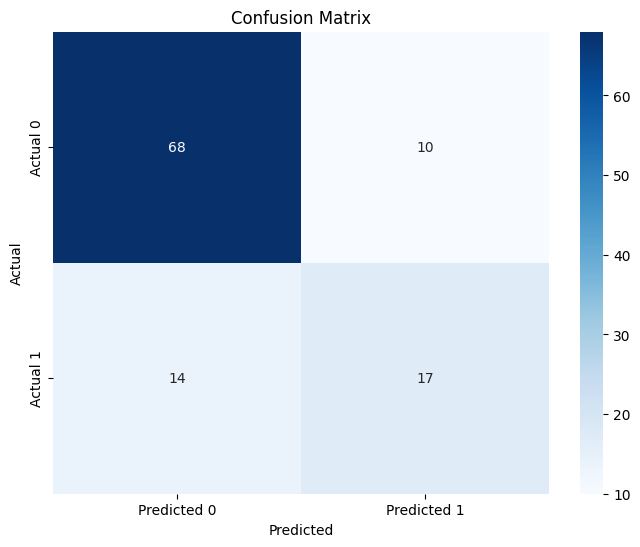

In [55]:
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [56]:
#from sklearn.linear_model import LogisticRegression

In [57]:
# logreg_classifier = LogisticRegression(random_state=42)
# logreg_classifier.fit(X_train, y_train)

In [58]:
# y_pred_logreg = logreg_classifier.predict(X_test)

In [59]:
# accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
# print(f"Accuracy of the Logistic Regression Classifier: {accuracy_logreg}")

In [60]:
# cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues",
#             xticklabels=['Predicted 0', 'Predicted 1'],
#             yticklabels=['Actual 0', 'Actual 1'])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix (Logistic Regression)")
# plt.show()


In [61]:
# from sklearn import svm

In [62]:
# svm_classifier = svm.SVC(kernel='linear')

In [63]:
# svm_classifier.fit(X_train, y_train)

In [64]:
# y_pred_svm = svm_classifier.predict(X_test)

In [65]:
# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# print(f"Accuracy of the SVM Classifier: {accuracy_svm}")

In [66]:
import pickle
with open('model.pkl','wb') as file:
  pickle.dump(best_rf_classifier,file)